# Load modules and data 

In [1]:
# Modules usuels de python

import os
import pandas as pd 
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import seaborn as sns

# load data
from keras.datasets import mnist

## Prétraitement des données

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

## Pour la réduction de dimensions

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA # méthode de réduction par analyse des composantes principales 
from sklearn.preprocessing import StandardScaler

## Modèles de machine learning pour la classification KNN
from sklearn.neighbors import KNeighborsClassifier

2024-06-13 08:18:18.423346: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-13 08:18:18.423382: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-13 08:18:18.424544: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-13 08:18:18.431289: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-13 08:18:19.848107: W tensorflow/compiler/tf2

# Data visualisation

train_X: (60000, 28, 28)
train_Y: (60000,)
test_X:  (10000, 28, 28)
test_Y:  (10000,)


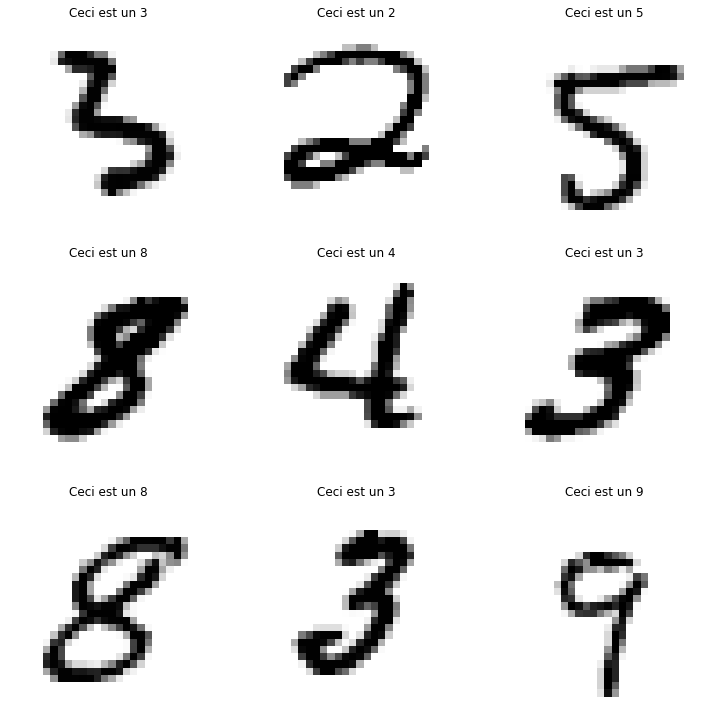

In [3]:
 
#loading
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()
 
#shape of dataset
print('train_X: ' + str(train_X.shape))
print('train_Y: ' + str(train_Y.shape))
print('test_X:  '  + str(test_X.shape))
print('test_Y:  '  + str(test_Y.shape))
 

fig, axes = plt.subplots(3, 3, figsize=(10, 10))


for ax in axes.flat:
    i = np.random.randint(len(train_X))
    ax.imshow(train_X[i], cmap='gray_r')
    ax.set_title(f"Ceci est un {train_Y[i]}")
    ax.axis('off')


# Ajustez l'espacement entre les sous-graphiques si nécessaire
plt.tight_layout(h_pad=2,w_pad=5)

# Affichez la figure
plt.show()

# class distribution

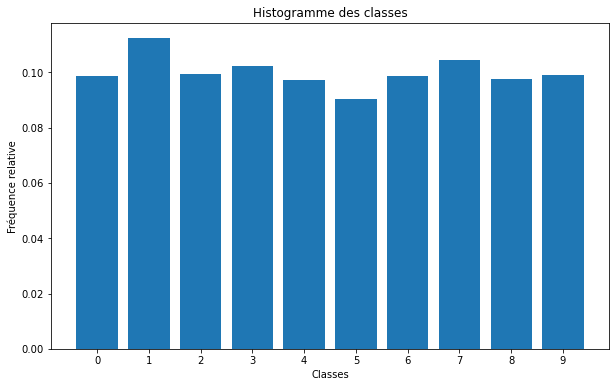

In [4]:
## Vérification de la taille des classes 

E = [len(train_Y[train_Y==i])/len(train_Y) for i in np.unique(train_Y)]

# Utilisez la fonction zip pour associer les éléments des deux listes et créez un dictionnaire
dictionnaire = dict(zip(np.unique(train_Y), E))

keys = np.sort(list(dictionnaire.keys()))

values = [dictionnaire[key] for key in keys]


# Créez un histogramme
plt.figure(figsize=(10, 6))
plt.bar(keys, values)
plt.xlabel('Classes')
plt.ylabel('Fréquence relative')
plt.title('Histogramme des classes')
plt.xticks(keys)  # Afficher toutes les classes sur l'axe des x
plt.show()

Comme nous pouvons le voir sur le graphique ci-dessus, les classes semblent équilibrées. 

# ACP visualisation 

In [7]:

# Définition du pipeline avec StandardScaler et PCA
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.9))
])

# Redimensionnement du tableau train_X
train_X_reshaped = train_X.reshape(train_X.shape[0], -1)

# Entraînement du pipeline sur les données train_X
train_X_pca = pipeline.fit_transform(train_X_reshaped)

test_X_pca = pipeline.transform(test_X.reshape(test_X.shape[0], -1))

In [31]:
print(pipeline.named_steps["pca"].explained_variance_ratio_.cumsum())

print(pipeline.named_steps["pca"].components_.shape)



[0.05646717 0.09724989 0.13464369 0.16349484 0.18870593 0.21064863
 0.22988207 0.24734006 0.26269099 0.27670818 0.29012561 0.30216303
 0.31330873 0.32420796 0.33449446 0.34443932 0.35380315 0.36301361
 0.37194798 0.3806471  0.38892074 0.39695491 0.40460336 0.41202109
 0.41917402 0.42609249 0.43293384 0.43950059 0.44581736 0.45194656
 0.45790911 0.46378627 0.46950219 0.47512526 0.48067208 0.48605627
 0.49136809 0.49656415 0.50164626 0.50644631 0.51121087 0.51590227
 0.52044576 0.52495921 0.52942885 0.53386268 0.53824483 0.54254865
 0.54681743 0.5510539  0.55510086 0.55909534 0.5630699  0.56700811
 0.57086624 0.57465667 0.57841069 0.58211845 0.5857679  0.5893609
 0.59288472 0.59636266 0.59980677 0.60320546 0.606565   0.60991386
 0.6132325  0.61646276 0.61962553 0.62275797 0.62586528 0.62893771
 0.63198685 0.63501403 0.63800888 0.64098649 0.64393701 0.64684139
 0.64970995 0.65256673 0.65540071 0.65822698 0.66102249 0.66381554
 0.66660073 0.66937529 0.6721343  0.67487657 0.67759067 0.68028

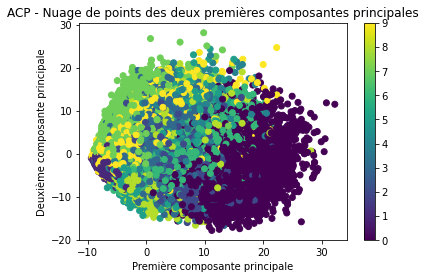

In [18]:

plt.scatter(train_X_pca[:, 0], train_X_pca[:, 1], c=train_Y)

plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.title('ACP - Nuage de points des deux premières composantes principales')
plt.colorbar()
plt.show()